<a href="https://colab.research.google.com/github/anudeeplearning/Market-Risk/blob/main/montecarlo_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We calculate the VaR using monte carlo simulation assuming a geometric brownian motion 

s(t+1) = s(t) *exp(d+a*r)

d=(r-sigma*2/2)*dt

a=sigma*sqrt(dt)

In [ ]:
import datetime as dt, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy.stats as scs

In [ ]:
n_sims = 1000000
rfr = 0
time = 30
vol = 0.25
S0 = 1

In [ ]:
d = (rfr-0.5*vol**2)*(time/252)
a = vol*np.sqrt(time/252)
r=np.random.normal(0,1,(n_sims,1))

GBM_returns = S0*np.exp(d + a*r)

In [ ]:
GBM_returns

array([[1.13102973],
       [0.93907816],
       [1.05294143],
       ...,
       [0.88350118],
       [0.93231311],
       [0.91853872]])

In [ ]:
confidence_intervals = [0.01,0.1,1.0,2.5,5.0,10.0]
var = scs.scoreatpercentile(GBM_returns-1,confidence_intervals)

In [ ]:
df = pd.DataFrame(var, confidence_intervals,columns = ['VaR'])
df

,VaR
0.01,-0.275475
0.10,-0.236196
1.00,-0.184524
2.50,-0.158619
5.00,-0.135561
10.00,-0.108025


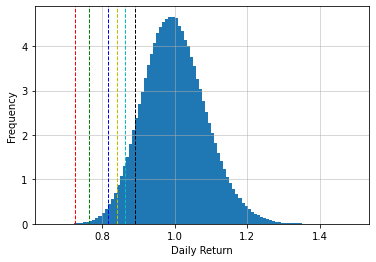

In [ ]:
plt.hist(GBM_returns, density = True, bins = 100)

plt.axvline(df.loc[0.01]['VaR']+1, color='r', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[0.1]['VaR']+1, color='g', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[1]['VaR']+1, color='b', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[2.5]['VaR']+1, color='y', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[5]['VaR']+1, color='c', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[10]['VaR']+1, color='k', linestyle='dashed',linewidth=1)

plt.ylabel('Frequency')
plt.xlabel('Daily Return')
plt.grid(True,linewidth = 0.5)
plt.show()

In [ ]:
num_days =10
df.loc[1]['VaR'] * np.sqrt(num_days/30)

-0.10653481510321539

For regulatory purposes, 99% VaR is calculated for 10 days which is 10.65%. 99%VaR for the whole 30 day period is 18.45%